# Diabetes Risk Dataset - EDA, Pipeline de preprocesamiento, modelo y evaluación
## David Emmanuel Santana Romero (T035967)
## Introducción

En este notebook realizaremos análisis exploratorio de datos en el dataset de Diabetes Risk para posteriormente construir un pipeline de preprocesamiento para las características numéricas y categóricas. Además, entrenaremos un modelo de regresión para calcular el riesgo, lo evaluaremos y lo exportaremos.

El dataset contiene información sobre múltiples pacientes, con indicadores metabólicos que van desde el nivel de glucosa, nivel de insulina, IMC, y colesterol, así como características como dieta, actividad física, descanso, y estrés, con una etiqueta del riesgo calculado para cada uno.

El objetivo y problema a resolver es predecir el riesgo de padecer diabetes encuadrándole exclusivamente en las características de entrada de este modelo, haciendo de esto una regresión. El dataset se puede encontrar en el siguiente enlace de Kaggle: https://www.kaggle.com/datasets/vishardmehta/diabetes-risk-prediction-dataset

Comenzaremos importando las librerías necesarias y cargando el dataset como un DataFrame de pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('./datasets/diabetes_risk_dataset.csv')

data

,Patient_ID,age,gender,bmi,blood_pressure,fasting_glucose_level,insulin_level,HbA1c_level,cholesterol_level,triglycerides_level,physical_activity_level,daily_calorie_intake,sugar_intake_grams_per_day,sleep_hours,stress_level,family_history_diabetes,waist_circumference_cm,diabetes_risk_score,diabetes_risk_category
0,1,77,Female,33.8,154,93,12.1,5.2,242,194,Low,2169,78.4,8.1,4,No,101.1,52.3,Prediabetes
1,2,54,Male,19.2,123,94,4.6,5.4,212,76,High,1881,16.5,6.6,3,No,60.0,3.7,Low Risk
2,3,25,Male,33.7,141,150,10.8,6.9,247,221,Low,2811,147.9,6.7,10,Yes,114.7,87.3,High Risk
3,4,23,Female,32.8,140,145,11.6,6.8,195,193,Low,2826,98.3,4.4,9,Yes,96.6,76.1,High Risk
4,5,70,Male,33.7,165,90,18.3,5.6,217,170,Moderate,2610,65.8,9.1,5,Yes,107.4,47.7,Prediabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,58,Male,21.8,158,89,6.3,5.3,198,132,High,1995,44.1,7.6,7,No,82.7,0.0,Low Risk
5996,5997,73,Male,47.3,193,109,33.7,6.1,250,209,Low,3401,61.4,5.3,10,Yes,150.0,100.0,High Risk
5997,5998,35,Male,31.0,139,90,15.1,5.3,190,164,Moderate,3022,86.7,6.8,3,Yes,102.7,22.3,Low Risk
5998,5999,58,Male,26.2,136,88,6.3,5.5,223,126,High,2311,28.2,8.4,5,No,90.6,3.9,Low Risk


## Información básica y estadísticas

Utilizaremos el método `.info()` para obtener un vistazo rápido al dataset, incluyendo el número de entradas no nulas y su tipo.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient_ID                  6000 non-null   int64  
 1   age                         6000 non-null   int64  
 2   gender                      6000 non-null   object 
 3   bmi                         6000 non-null   float64
 4   blood_pressure              6000 non-null   int64  
 5   fasting_glucose_level       6000 non-null   int64  
 6   insulin_level               6000 non-null   float64
 7   HbA1c_level                 6000 non-null   float64
 8   cholesterol_level           6000 non-null   int64  
 9   triglycerides_level         6000 non-null   int64  
 10  physical_activity_level     6000 non-null   object 
 11  daily_calorie_intake        6000 non-null   int64  
 12  sugar_intake_grams_per_day  6000 non-null   float64
 13  sleep_hours                 6000 

De igual forma, obtenemos estadísticas resumidas para las columnas numéricas con el método `.describe()`. Lo transpondremos para mejorar la legibilidad.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,6000.0,3000.500000,1732.195139,1.0,1500.75,3000.50,4500.25,6000.0
age,6000.0,52.230667,18.757508,20.0,36.00,53.00,68.00,84.0
bmi,6000.0,32.939667,7.510155,16.0,26.90,32.75,38.50,50.0
blood_pressure,6000.0,144.482500,17.867248,91.0,132.00,144.00,157.00,200.0
fasting_glucose_level,6000.0,106.105500,31.213994,60.0,87.00,96.00,114.00,281.0
insulin_level,6000.0,15.080333,9.245581,2.0,7.10,13.80,21.00,55.9
HbA1c_level,6000.0,5.784583,0.956614,4.1,5.20,5.50,6.10,11.0
cholesterol_level,6000.0,217.490667,24.888595,139.0,200.00,217.00,234.00,309.0
triglycerides_level,6000.0,177.351500,51.897606,50.0,137.00,173.00,213.00,383.0
daily_calorie_intake,6000.0,2479.547000,548.410642,1200.0,2055.00,2385.00,2848.25,5249.0


En total contamos con **19 columnas**:

1. **Patient_ID (int64):** Identificador único del paciente. Es una variable puramente técnica, sin valor predictivo intrínseco. No debe utilizarse como feature en el modelo, ya que introduce ruido y posible sobreajuste.

2. **age (int64):** Edad del paciente en años. Variable numérica discreta. Es clínicamente relevante, ya que el riesgo de diabetes tipo 2 aumenta con la edad.

3. **gender (object):** Género del paciente (variable categórica tipo string). Requiere codificación si se utiliza en el modelo. Puede capturar diferencias biológicas o conductuales asociadas al riesgo metabólico.

4. **bmi (float64):** Índice de masa corporal. Variable numérica continua. Indicador central de obesidad o sobrepeso, altamente correlacionado con riesgo de resistencia a la insulina.

5. **blood_pressure (int64):** Presión arterial. Variable numérica discreta. La hipertensión suele estar asociada al síndrome metabólico.

6. **fasting_glucose_level (int64):** Nivel de glucosa en ayunas. Variable numérica discreta. Es una de las variables más directamente relacionadas con diagnóstico de diabetes.

7. **insulin_level (float64):** Nivel de insulina en sangre. Variable continua. Permite evaluar resistencia a la insulina o disfunción pancreática.

8. **HbA1c_level (float64):** Hemoglobina glucosilada. Variable continua. Refleja el promedio de glucosa en sangre en los últimos 2–3 meses. Es uno de los indicadores diagnósticos estándar de diabetes.

9. **cholesterol_level (int64):** Nivel de colesterol total. Variable numérica discreta. Puede relacionarse con desórdenes metabólicos y riesgo cardiovascular.

10. **triglycerides_level (int64):** Nivel de triglicéridos. Variable numérica discreta. Elevaciones suelen asociarse a resistencia a la insulina.

11. **physical_activity_level (object):** Nivel de actividad física (categórica tipo string). Requiere codificación. Variable conductual con impacto significativo en el riesgo metabólico.

12. **daily_calorie_intake (int64):** Ingesta calórica diaria estimada. Variable numérica discreta. Puede correlacionarse con obesidad y desbalance energético.

13. **sugar_intake_grams_per_day (float64):** Consumo diario de azúcar en gramos. Variable continua. Factor dietético relevante para alteraciones glucémicas.

14. **sleep_hours (float64):** Horas de sueño promedio por día. Variable continua. El sueño insuficiente o excesivo se asocia con alteraciones metabólicas.

15. **stress_level (int64):** Nivel de estrés (probablemente escala ordinal). Variable numérica discreta. El estrés crónico puede influir en regulación hormonal y metabólica.

16. **family_history_diabetes (object):** Historial familiar de diabetes (categórica tipo string, sí/no). Variable importante por componente genético.

17. **waist_circumference_cm (float64):** Circunferencia de cintura en centímetros. Variable continua. Indicador directo de adiposidad visceral, fuerte predictor de riesgo metabólico.

18. **diabetes_risk_score (float64):** Puntaje numérico continuo que representa riesgo estimado de diabetes. Puede funcionar como variable intermedia o como target en un problema de regresión.

19. **diabetes_risk_category (object):** Categoría de riesgo (variable categórica tipo string). Es el candidato natural a variable objetivo para un problema de clasificación .

Para nuestro problema de regresión, tomaremos como características age, gender, bmi, blood_pressure, fasting_glucose_level, insulin_level, HbA1c_level, cholesterol_level, triglycerides_level, physical_activity_level, daily_calorie_intake, sugar_intake_grams_per_day, sleep_hours, stress_level, family_history_diabetes, waist_circumference_cm; ignoraremos Patient_ID y diabetes_risk_category. Nuestra etiqueta será diabetes_risk_score.

## Visualización de características numéricas

Para visualizar las distribuciones, usaremos la librería `seaborn`, creando histogramas con densidad de kernel y estimados KDE para cada columna numérica.

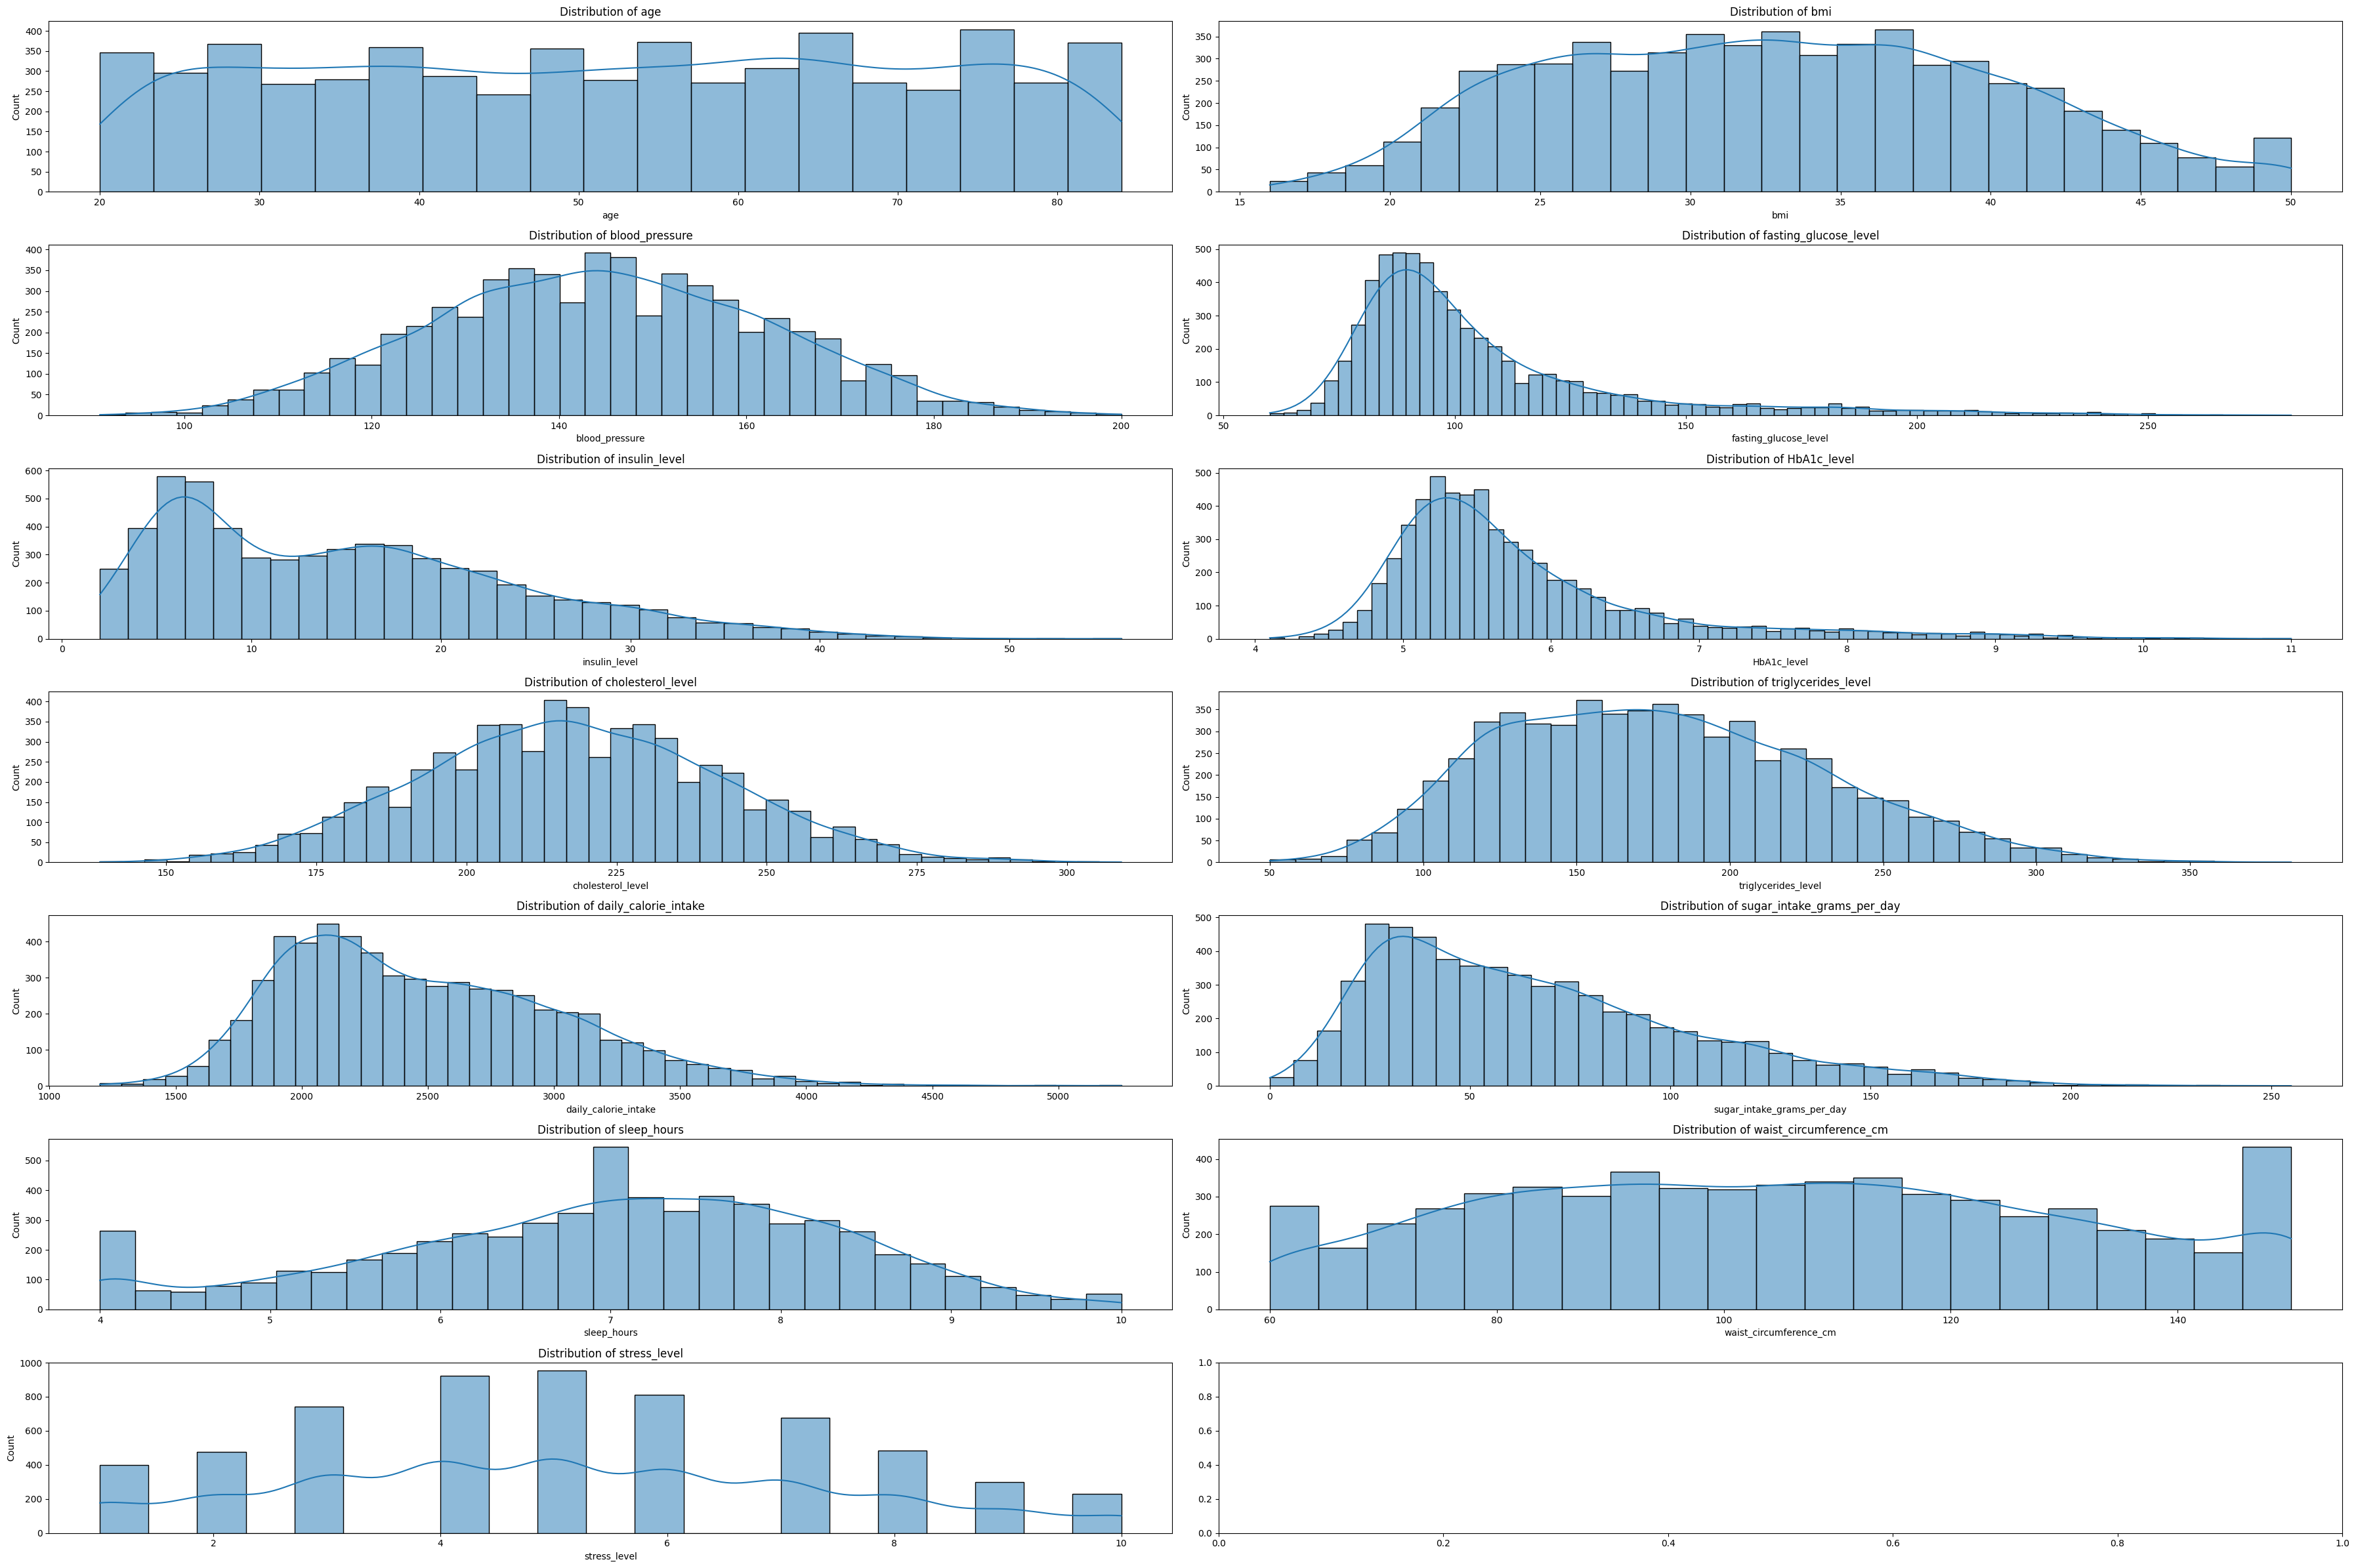

In [5]:
numerical_cols = ['age', 'bmi', 'blood_pressure', 'fasting_glucose_level', 'insulin_level', 'HbA1c_level', 'cholesterol_level', 'triglycerides_level', 'daily_calorie_intake', 'sugar_intake_grams_per_day', 'sleep_hours', 'waist_circumference_cm', 'stress_level']

fig, axs = plt.subplots(7, 2, figsize=(36, 24))
for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

Como puede observarse, la distribución de `fasting_glucose_level` `insulin_level` `HbA1c_level` `daily_calorie_intake` `sugar_intake_grams_per_day` está sesgada a la izquierda (lo que es esperable, los seres humanos que tienen los valores más hacia el límite superior suelen o bien ya tener diabetes o estar muertos).

Debido a la magnitud de los valores, se utilizará Standard Scaler. Asimismo, buscaremos mejorar su distribución con Power Transformer.

## Visualización de las características categóricas

Revisaremos la distribución de las características categóricas con Countplots.

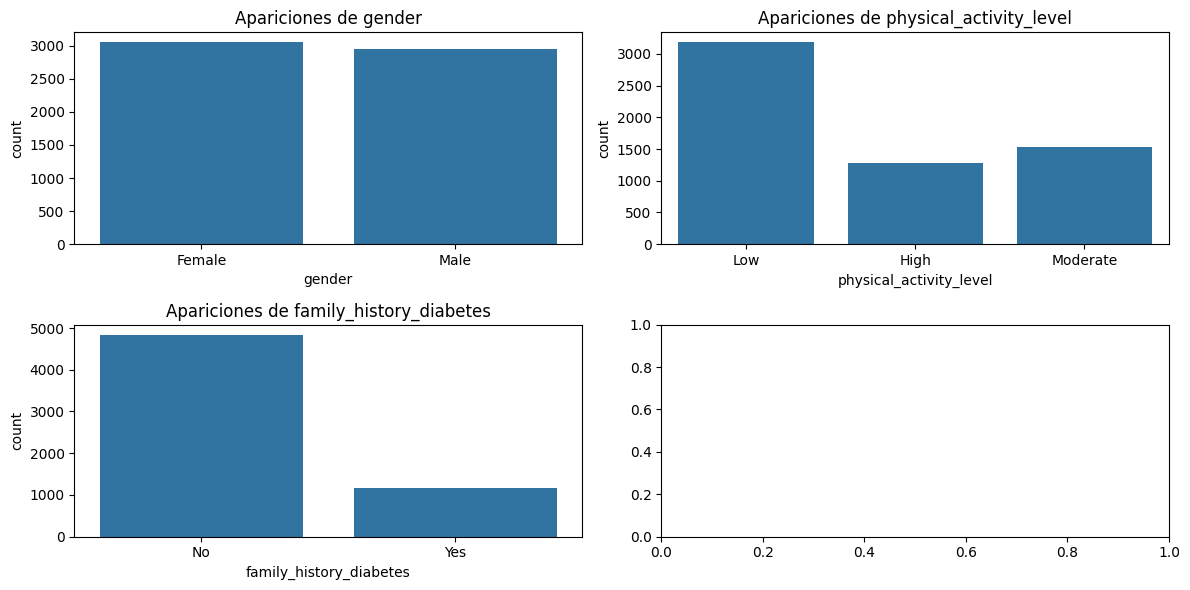

In [6]:
categorical_cols = ['gender', 'physical_activity_level', 'family_history_diabetes']

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Apariciones de {col}')

fig.tight_layout()

Se distribuyen casi equitativamente las observaciones por `gender`.

Hay una predominancia de baja actividad física en `physical_activity_level`.

También hay una predominancia de no diagnóstico de diabetes en la familia, para `family_history_diabetes`.

De cara al preprocesamiento, las variables categóricas representadas como texto requieren ser transformadas a un formato numérico adecuado para su uso en modelos predictivos. Una codificación por indicadores resulta apropiada para conservar la información de cada categoría sin imponer relaciones artificiales entre ellas.

## Distribución de la etiqueta objetivo

A continuación tenemos los datos de diabetes_risk_score analizados en una distribución.

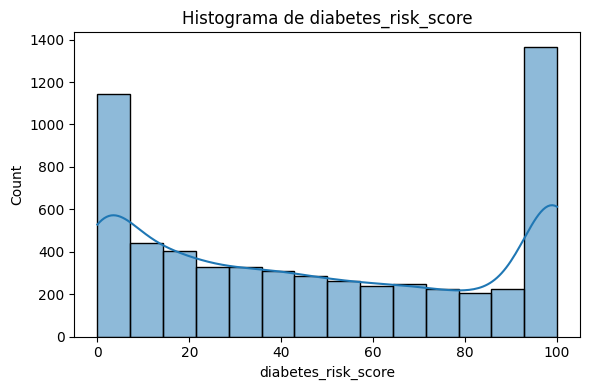

In [7]:
fig = plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='diabetes_risk_score', kde=True)
plt.title('Histograma de diabetes_risk_score')
plt.tight_layout()

Comparemos con las características categóricas.

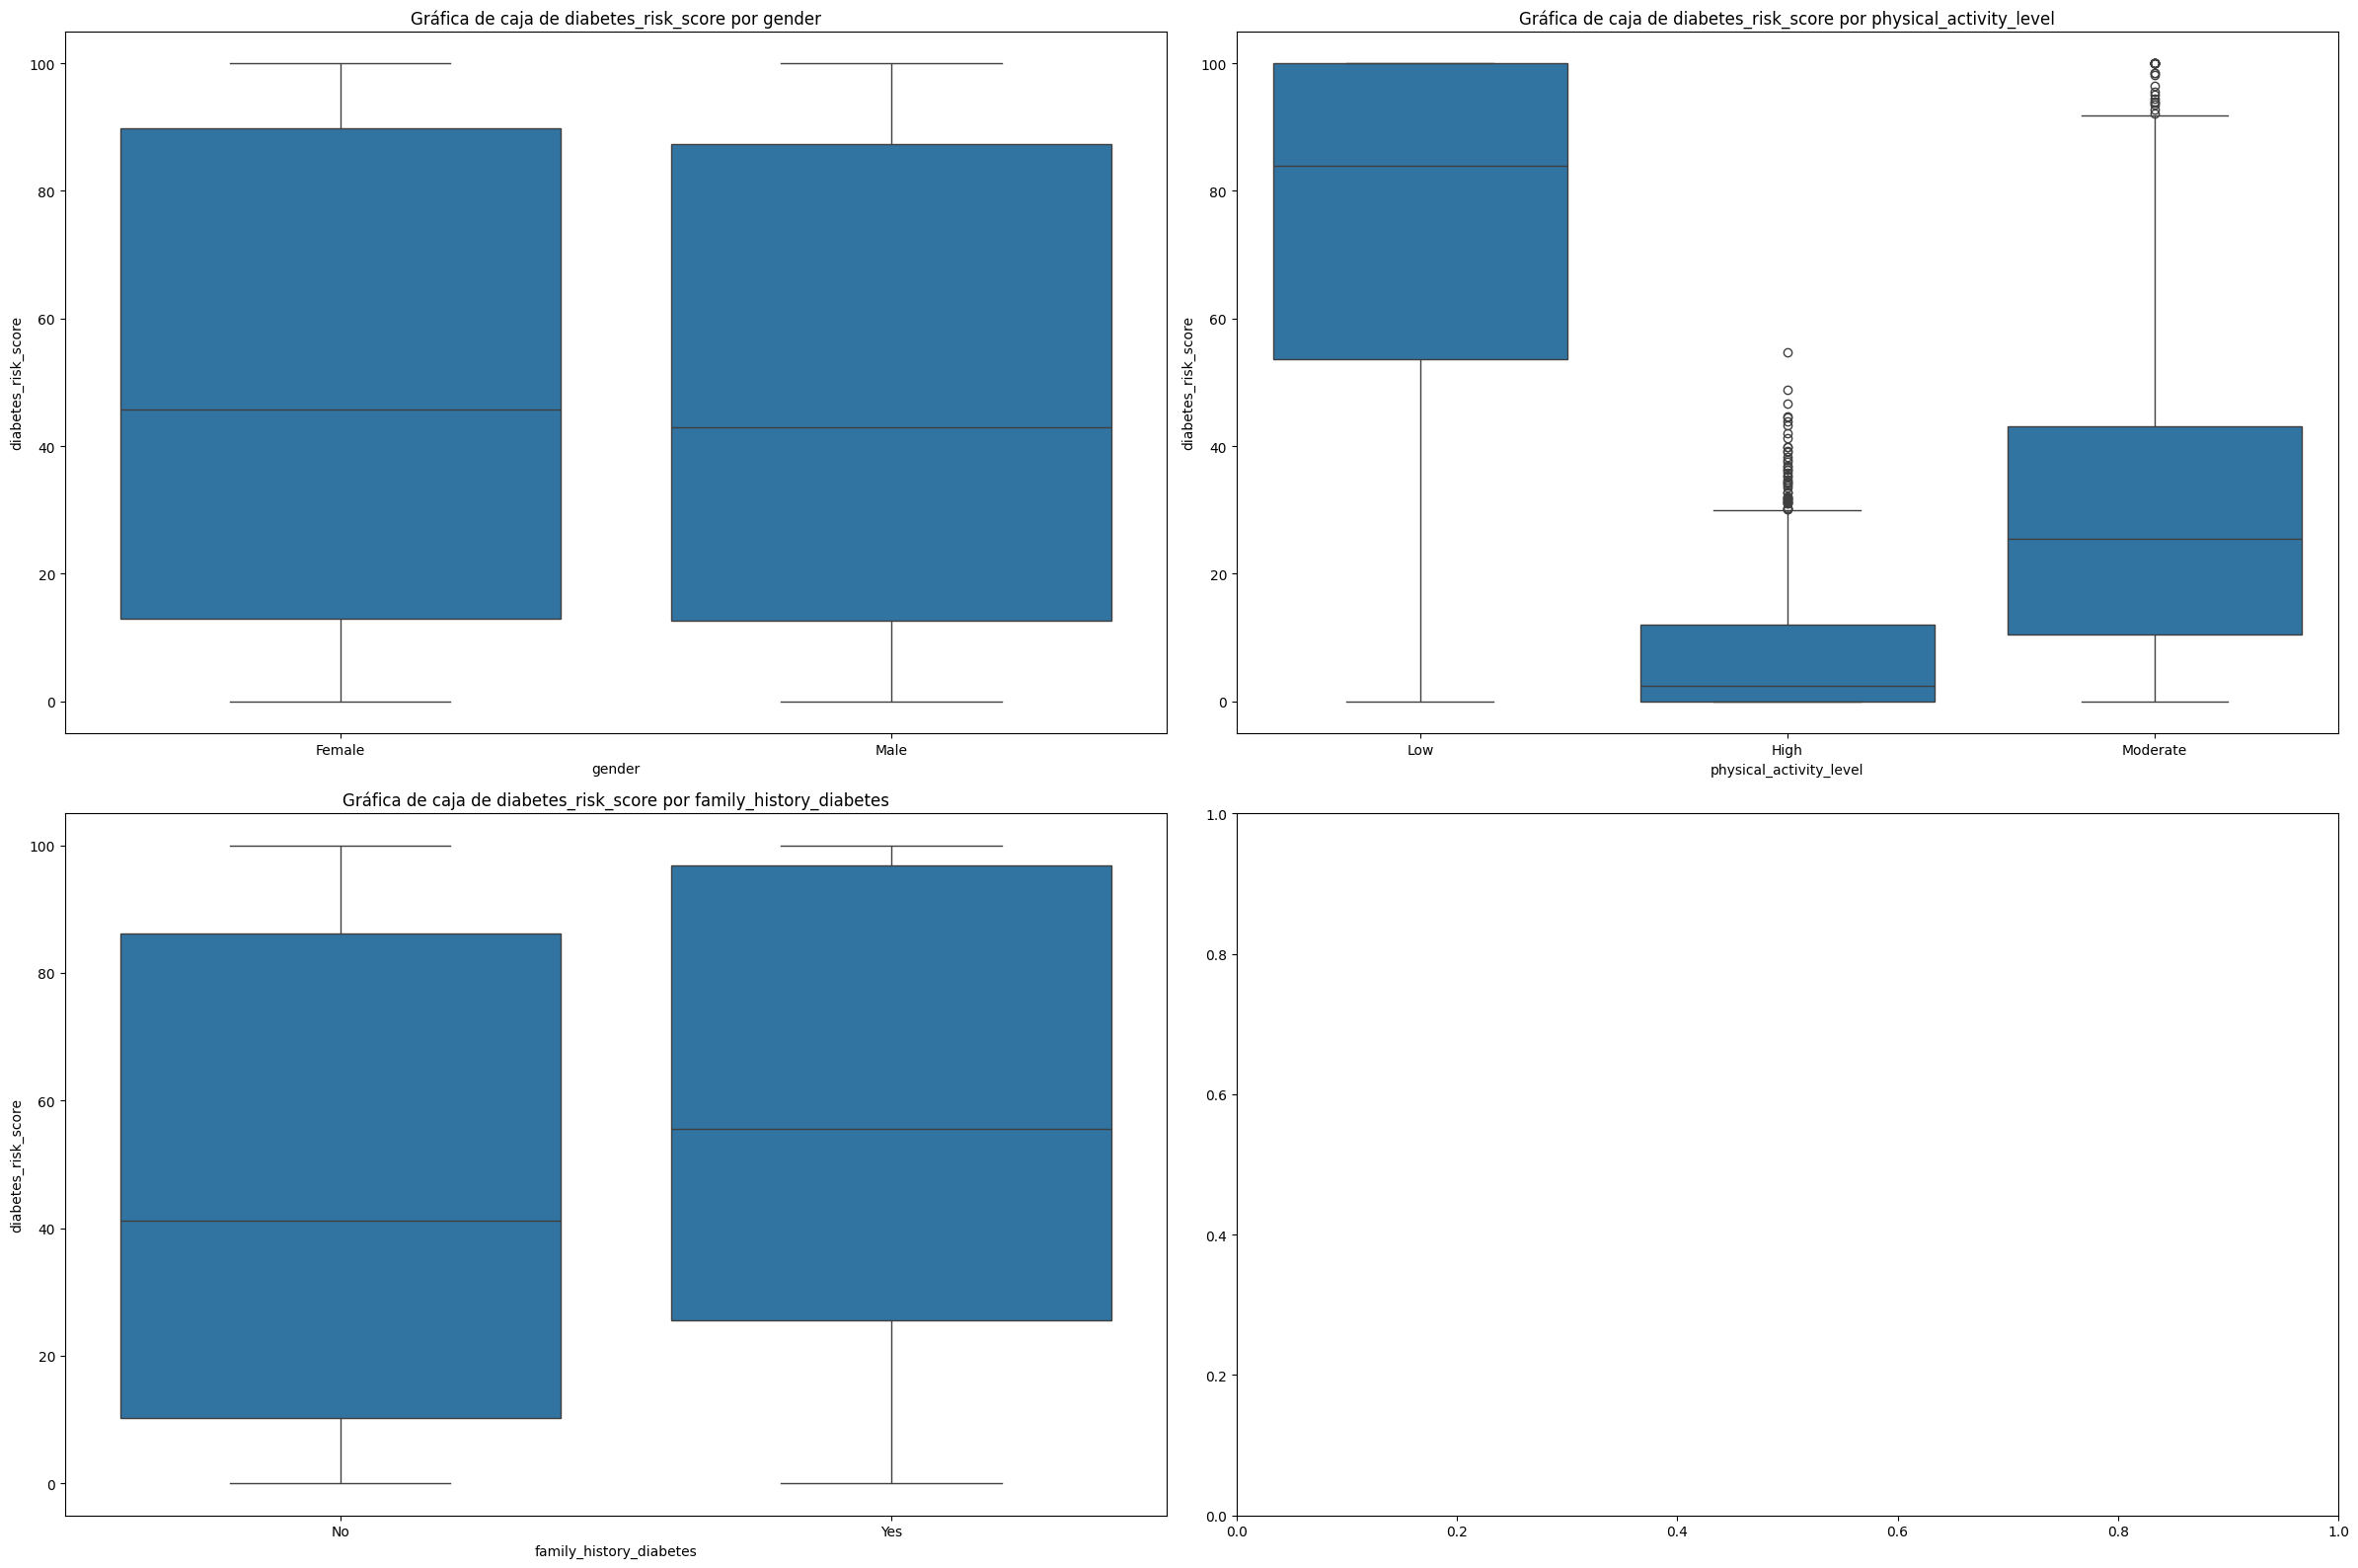

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(24, 16))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.boxplot(data=data, y='diabetes_risk_score', x=col, ax=ax)
    ax.set_title(f'Gráfica de caja de diabetes_risk_score por {col}')

fig.tight_layout()

En el caso de gender, la distribución del puntaje de riesgo es prácticamente equivalente entre mujeres y hombres. Las medianas se ubican en valores muy similares y los rangos intercuartílicos presentan una superposición casi total. Tampoco se aprecia una diferencia clara en la extensión de los valores extremos. Esto sugiere que el género, considerado de forma aislada, no introduce una variación sustancial en el puntaje de riesgo dentro de este conjunto de datos. Desde una perspectiva de modelado, su contribución podría ser secundaria o depender de interacciones con otras variables.

La relación cambia de forma marcada al analizar physical_activity_level. Aquí se observa una estructura ordenada y consistente: el grupo con nivel bajo de actividad física presenta medianas elevadas y una concentración importante de valores altos del puntaje; el nivel moderado se sitúa en una posición intermedia; y el nivel alto muestra medianas considerablemente menores y una mayor concentración de valores bajos. La relación parece casi monótona: a mayor actividad física, menor puntaje de riesgo. Esta separación clara indica que la variable posee una señal fuerte y potencialmente discriminativa, coherente con la evidencia clínica sobre la relación entre actividad física y riesgo metabólico.

Finalmente, al observar family_history_diabetes, se aprecia un desplazamiento consistente hacia valores más altos del puntaje en el grupo con antecedentes familiares. Aunque existe superposición entre ambos grupos, la mediana y buena parte de la distribución del grupo “Yes” se ubican por encima del grupo “No”. Esto indica que la historia familiar introduce una señal relevante, probablemente asociada a factores genéticos y ambientales compartidos.

Y para las características numéricas.

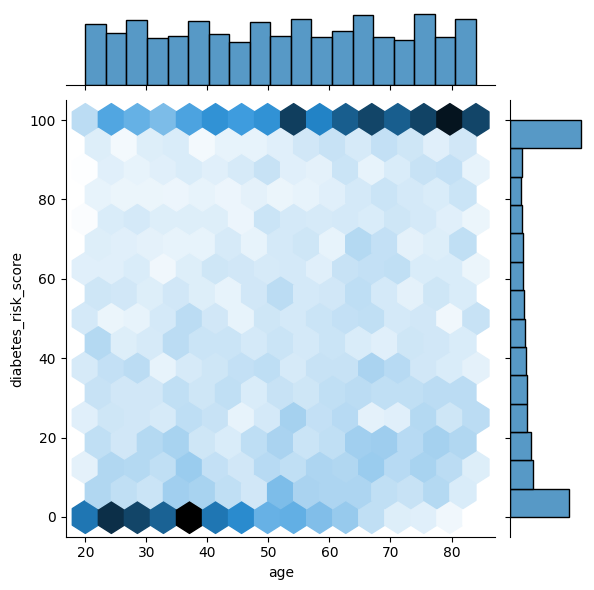

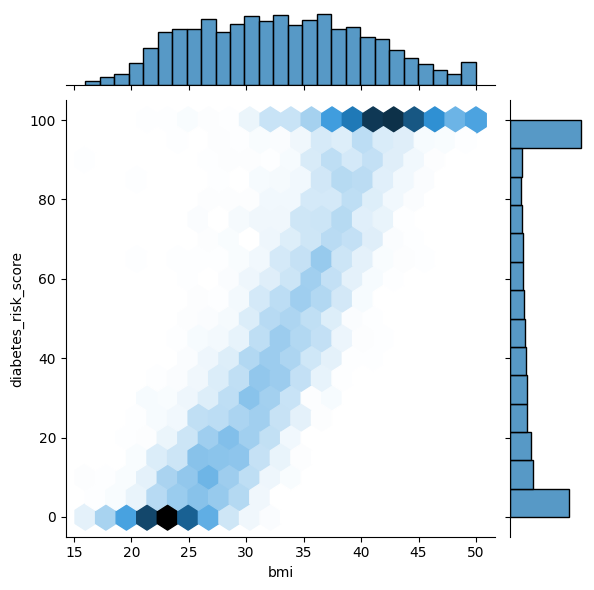

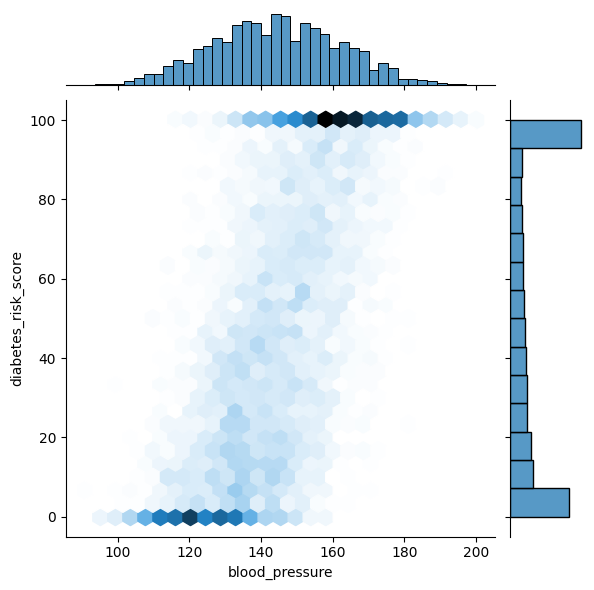

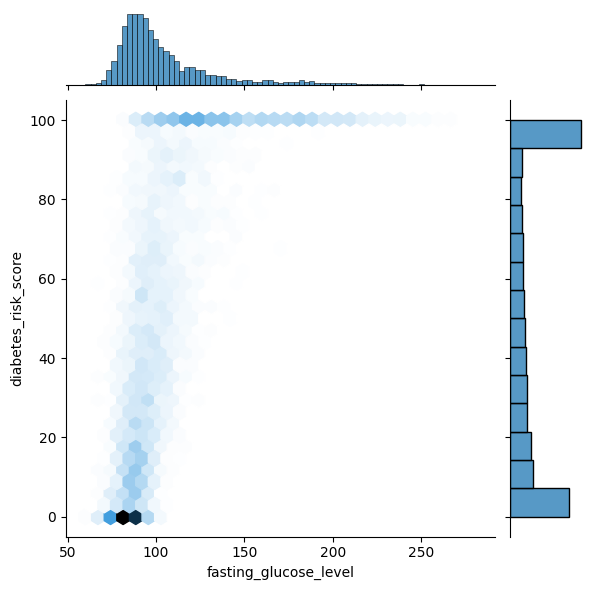

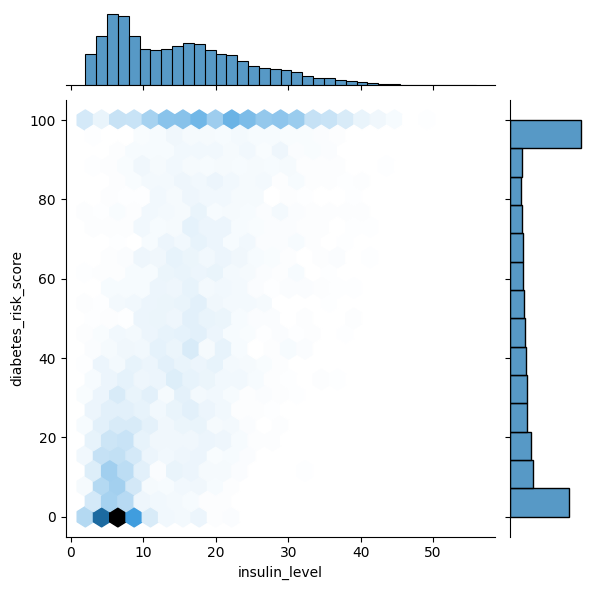

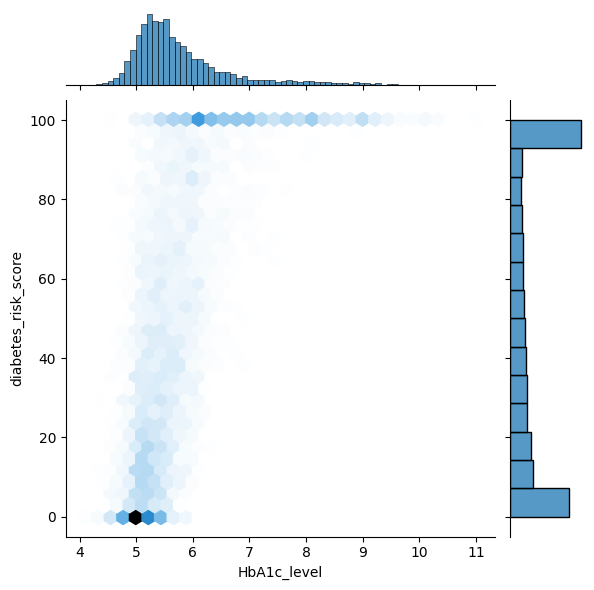

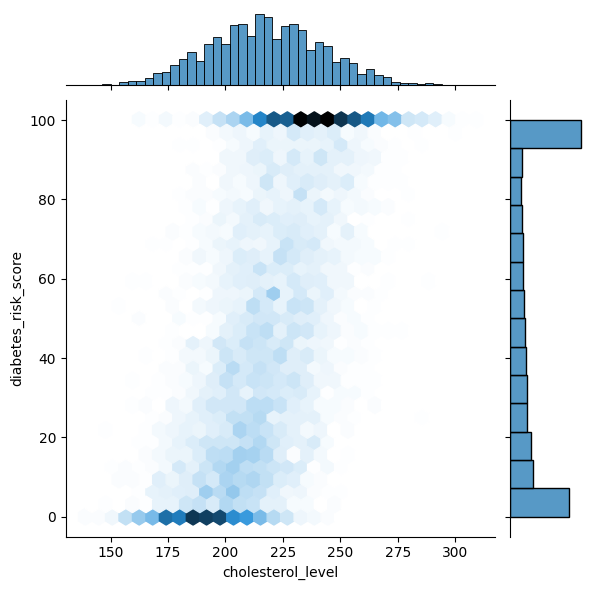

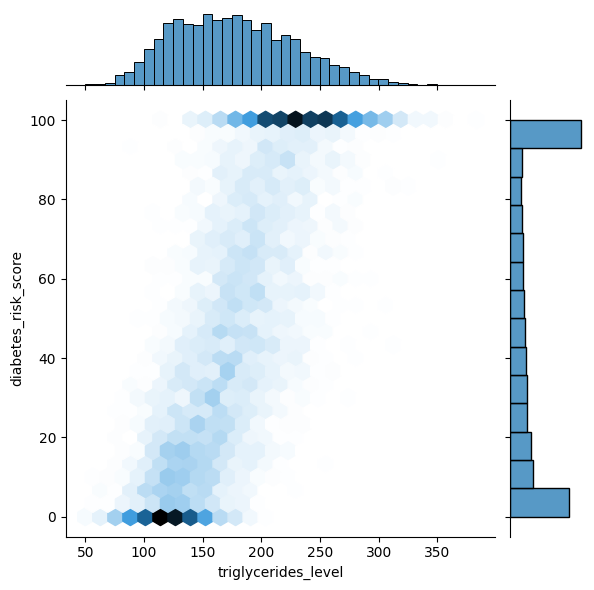

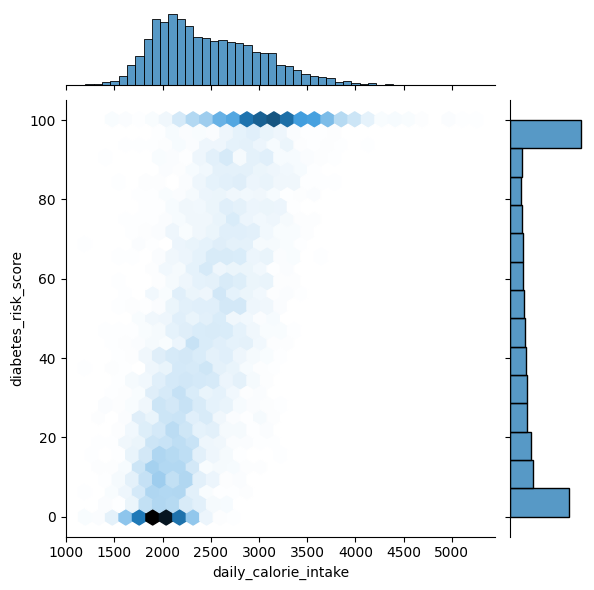

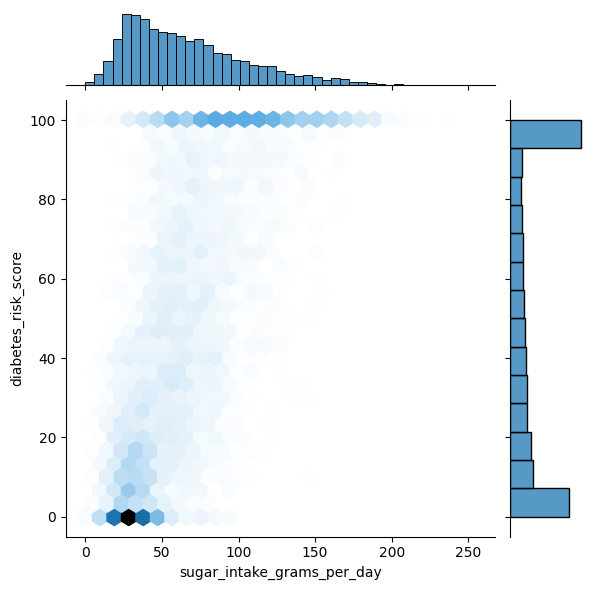

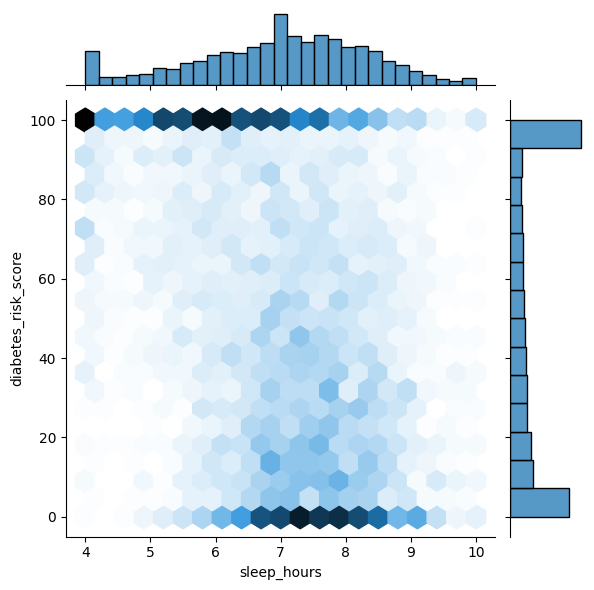

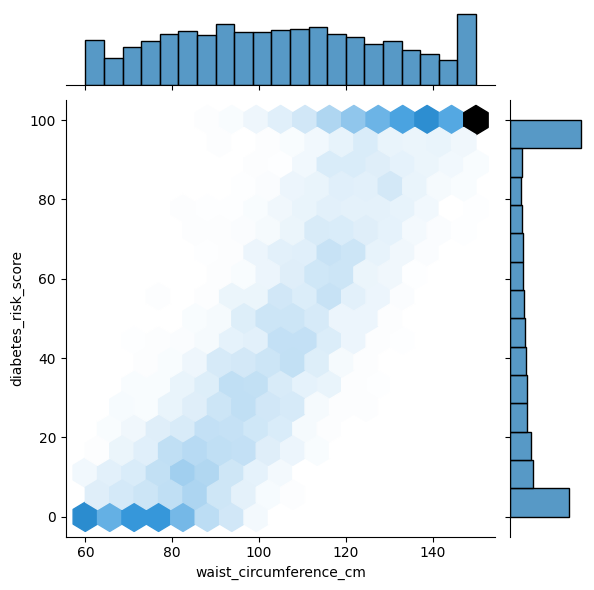

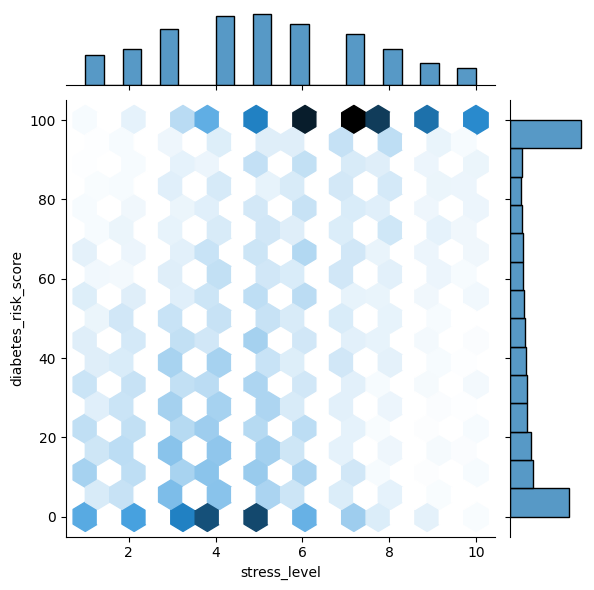

In [9]:
for col in numerical_cols:
    sns.jointplot(data=data, y='diabetes_risk_score', x=col, kind='hex')
    ax.set_title(f'Gráfica de caja de diabetes_risk_score por {col}')

fig.tight_layout()


La **edad** presenta una tendencia positiva moderada. A medida que aumenta la edad, el puntaje de riesgo tiende a concentrarse en valores más altos, aunque con amplia dispersión. No se observa una frontera clara, lo que sugiere que la edad contribuye al riesgo, pero no lo determina por sí sola.

El **IMC** muestra una relación positiva más marcada y estructurada. Existe un gradiente ascendente consistente: valores bajos de BMI se asocian a puntajes bajos, mientras que valores altos concentran riesgo elevado. La forma sugiere una relación aproximadamente monotónica, lo que anticipa alta relevancia predictiva.

La **presión arterial** también exhibe una tendencia positiva, aunque más difusa que BMI. El riesgo aumenta conforme se incrementa la presión, pero con superposición significativa entre niveles intermedios.

El **nivel de glucosa en ayunas** presenta una de las relaciones más fuertes. A partir de ciertos umbrales, el puntaje de riesgo se eleva abruptamente. La concentración de valores altos de riesgo en glucosas elevadas indica una asociación directa y clínicamente coherente.

El **nivel de insulina** muestra un patrón positivo, aunque con mayor dispersión en valores bajos. En niveles altos de insulina se concentra mayor riesgo, lo que podría reflejar resistencia a la insulina.

La **HbA1c** exhibe una relación claramente ascendente. Incrementos en este indicador se asocian casi sistemáticamente con mayores puntajes de riesgo, con menor dispersión relativa en valores altos. Es una variable con fuerte señal.

En **colesterol** y **triglicéridos** se observa una tendencia positiva progresiva. Aunque la dispersión es considerable en rangos medios, los valores más altos concentran riesgo elevado, lo que sugiere contribución relevante pero no determinística.

La **ingesta calórica diaria** presenta relación positiva moderada. A mayor consumo calórico, mayor concentración de puntajes elevados, aunque con dispersión amplia. Su efecto parece menos directo que el de marcadores clínicos.

El **consumo diario de azúcar** muestra un patrón positivo más claro que el de calorías totales. Niveles altos de azúcar se asocian con mayor densidad de puntajes elevados, indicando señal relevante.

Las **horas de sueño** no presentan una relación lineal evidente. La distribución es más dispersa y sugiere posible efecto no lineal o débil contribución individual. El riesgo parece concentrarse en ciertos rangos intermedios, pero sin gradiente claro.

La **circunferencia de cintura** muestra una relación positiva fuerte y estructurada, similar al BMI. El incremento en adiposidad central se asocia claramente con mayores puntajes de riesgo, lo que refuerza su valor predictivo.

El **nivel de estrés** presenta un patrón escalonado. A medida que aumenta el nivel ordinal, la concentración de puntajes altos se incrementa, aunque con dispersión considerable en niveles intermedios. La relación parece positiva pero no estrictamente lineal.

Las variables con señal más fuerte y consistente respecto al puntaje continuo son glucosa en ayunas, HbA1c, BMI y circunferencia de cintura. Edad, colesterol, triglicéridos y consumo de azúcar muestran asociaciones moderadas. Sueño y género, según análisis previo, parecen aportar señal débil. Este panorama sugiere que el modelo tendrá base sólida en marcadores metabólicos directos, mientras que variables conductuales actuarán como moduladores secundarios.

A continuación se muestra una matriz de correlación entre las características con valores numéricos y la etiqueta.

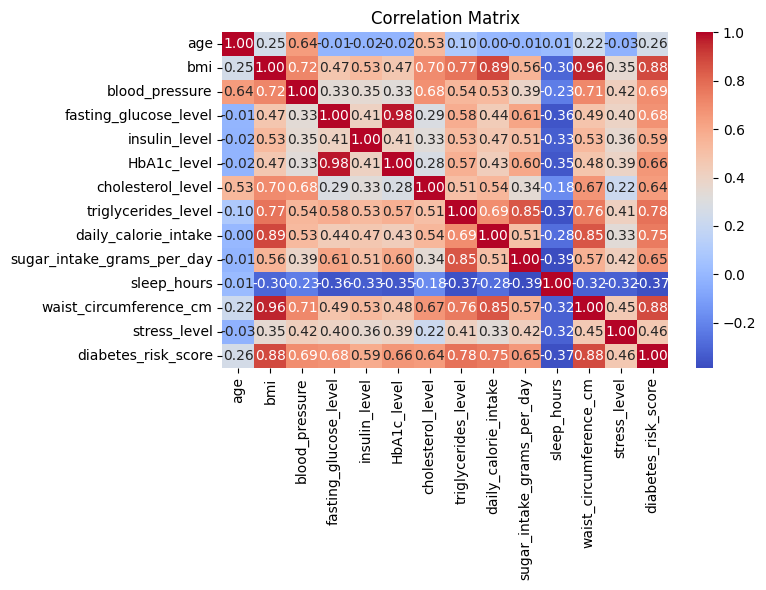

In [10]:
corr_matrix = data[['age', 'bmi', 'blood_pressure', 'fasting_glucose_level', 'insulin_level', 'HbA1c_level', 'cholesterol_level', 'triglycerides_level', 'daily_calorie_intake', 'sugar_intake_grams_per_day', 'sleep_hours', 'waist_circumference_cm', 'stress_level', 'diabetes_risk_score']].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

## Tratando valores faltantes

Visualizaremos la presencia de valores nulos en nuestro dataset.

<Axes: >

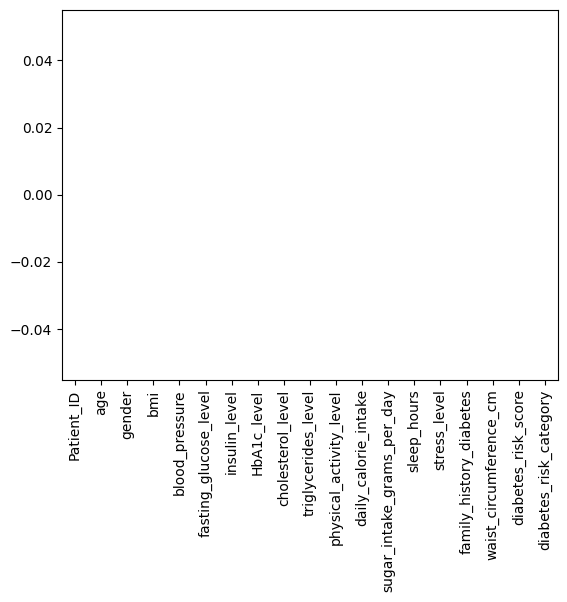

In [11]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

Y en valor porcentual...

In [12]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

Patient_ID                    0.0
physical_activity_level       0.0
diabetes_risk_score           0.0
waist_circumference_cm        0.0
family_history_diabetes       0.0
stress_level                  0.0
sleep_hours                   0.0
sugar_intake_grams_per_day    0.0
daily_calorie_intake          0.0
triglycerides_level           0.0
age                           0.0
cholesterol_level             0.0
HbA1c_level                   0.0
insulin_level                 0.0
fasting_glucose_level         0.0
blood_pressure                0.0
bmi                           0.0
gender                        0.0
diabetes_risk_category        0.0
dtype: float64

No hay valores faltantes.

## Pipelines de preprocesamiento

Para las variables numéricas (`numerical_cols`) se aplicó una secuencia compuesta por `PowerTransformer` seguido de `StandardScaler`. La inclusión de `PowerTransformer` responde a la necesidad de reducir asimetrías y aproximar las distribuciones a una forma más cercana a la normalidad, especialmente considerando que varias variables clínicas (como glucosa, insulina o triglicéridos) suelen presentar sesgos positivos. Esta transformación puede mejorar el comportamiento de modelos sensibles a la distribución y a la escala. Posteriormente, `StandardScaler` estandariza las variables a media cero y varianza unitaria, lo cual resulta pertinente en algoritmos que dependen de distancias o que optimizan funciones bajo supuestos de homogeneidad en escala.

Para las variables categóricas (`categorical_cols`) se utilizó `OneHotEncoder`. Dado que estas variables están representadas como cadenas de texto y no poseen una relación ordinal inherente, la codificación one-hot evita introducir un orden artificial entre categorías. Esta decisión preserva la naturaleza nominal de las variables y permite que el modelo aprenda pesos independientes para cada categoría.

In [13]:
preprocessing_pipeline = ColumnTransformer(
        transformers=[
            ('pwr_num', make_pipeline(PowerTransformer(), StandardScaler()), numerical_cols), # Se intenta normalizar la distribución de estos datos
            ('one_hot', make_pipeline(OneHotEncoder()), categorical_cols) # One Hot Encoding porque son categorías representadas con cadenas de texto
        ],
        remainder='passthrough'
    )

Definiremos nuestra matriz x y el vector objetivo y, así como dividir el dataset en subconjuntos de entrenamiento y de prueba; con estratificación para asegurar una buena distribución entre subconjuntos.

In [14]:
x = data[numerical_cols + categorical_cols]
y = data['diabetes_risk_score']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

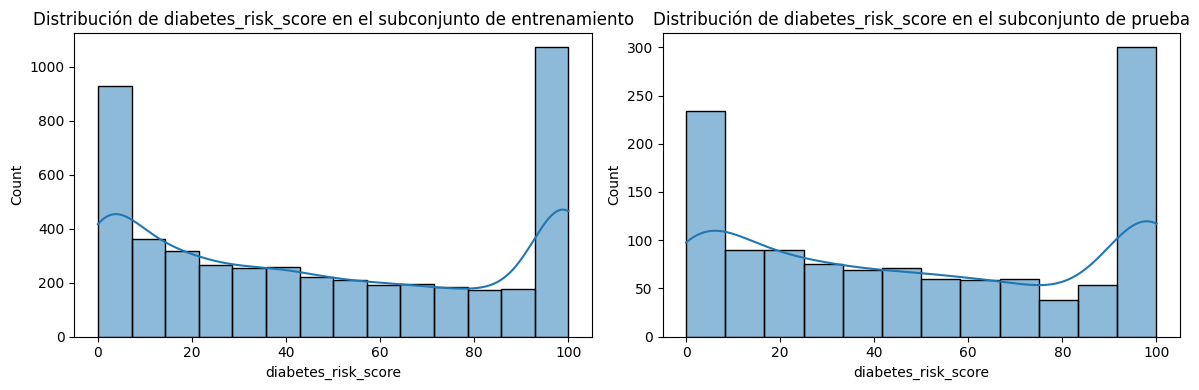

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x=y_train, ax=axs[0], kde=True)
axs[0].set_title('Distribución de diabetes_risk_score en el subconjunto de entrenamiento')
sns.histplot(x=y_test, ax=axs[1], kde=True)
axs[1].set_title('Distribución de diabetes_risk_score en el subconjunto de prueba')
fig.tight_layout()

Aplicaremos el pipeline de preprocesamiento y le ajustaremos, en el caso de los datos de entrenamiento. En el caso de los datos de prueba, solo los transformaremos sin ajuste.

## Construyendo el modelo de regresión

En esta etapa se implementó un procedimiento sistemático de selección de modelo y ajuste de hiperparámetros mediante `GridSearchCV` con validación cruzada. Todo el flujo fue encapsulado en un `Pipeline`, lo que garantiza que el preprocesamiento se aplique correctamente dentro de cada partición de validación, evitando fuga de información. Además, el modelo fue envuelto en un `TransformedTargetRegressor` para entrenar en el espacio logit del `diabetes_risk_score` (como glucosa, insulina o triglicéridos) y devolver predicciones en la escala original [0,100], respetando así la naturaleza acotada del target.

El espacio de búsqueda incluyó distintos tipos de regresores (previamente escalado) junto con configuraciones relevantes de hiperparámetros. Esto permitió comparar modelos lineales y no lineales bajo un mismo esquema metodológico. La métrica optimizada fue el error absoluto medio (MAE), dado que es interpretable en unidades del score y ofrece una medida robusta del error promedio. El resultado del `GridSearchCV` corresponde al modelo con mejor desempeño promedio en validación cruzada, lo que proporciona una estimación más confiable de su capacidad de generalización.


In [16]:
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

epsilon = 1e-6

def target_transform(y):
    y_scaled = y / 100
    y_scaled = np.clip(y_scaled, epsilon, 1 - epsilon)
    return np.log(y_scaled / (1 - y_scaled))

def target_inverse(z):
    y_scaled = 1 / (1 + np.exp(-z))
    return y_scaled * 100

pipe = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('model', LinearRegression())  # lo cambiaremos adelante, profe
])

model = TransformedTargetRegressor(
    regressor=pipe,
    func=target_transform,
    inverse_func=target_inverse,
    check_inverse=False
)

param_grid = [

    {
        'regressor__model': [LinearRegression()]
    },

    {
        'regressor__model': [Ridge()],
        'regressor__model__alpha': [0.1, 1.0, 10.0]
    },

    {
        'regressor__model': [RandomForestRegressor(random_state=42)],
        'regressor__model__n_estimators': [300, 500],
        'regressor__model__max_depth': [None, 20]
    },

    {
        'regressor__model': [GradientBoostingRegressor(random_state=42)],
        'regressor__model__n_estimators': [200],
        'regressor__model__learning_rate': [0.05, 0.1],
        'regressor__model__max_depth': [3, 5]
    }
]

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

best_model = grid.best_estimator_

print("Mejores parámetros encontrados:")
print(grid.best_params_)

y_test_pred = best_model.predict(x_test)

mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

x_test = x_test.copy()
x_test['diabetes_risk_score_Predicted'] = y_test_pred
x_test['diabetes_risk_score_Actual'] = y_test.values

x_test.head()


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros encontrados:
{'regressor__model': RandomForestRegressor(random_state=42), 'regressor__model__max_depth': None, 'regressor__model__n_estimators': 500}
MAE: 4.4745
RMSE: 7.1941
R2: 0.9628


,age,bmi,blood_pressure,fasting_glucose_level,insulin_level,HbA1c_level,cholesterol_level,triglycerides_level,daily_calorie_intake,sugar_intake_grams_per_day,sleep_hours,waist_circumference_cm,stress_level,gender,physical_activity_level,family_history_diabetes,diabetes_risk_score_Predicted,diabetes_risk_score_Actual
1782,74,44.4,174,200,17.0,8.7,269,273,3081,130.1,4.0,133.7,6,Female,Low,No,99.999898,100.0
3917,73,36.1,165,92,19.5,5.6,243,177,2185,32.7,9.0,107.8,3,Female,Low,Yes,73.247469,78.8
221,84,40.8,190,242,30.6,10.2,229,231,2764,74.8,4.0,141.7,7,Male,Low,No,99.999898,100.0
2135,24,24.5,126,158,15.6,7.4,160,237,1517,167.1,5.4,76.5,8,Female,Low,No,94.784821,57.8
5224,47,35.9,143,94,31.8,5.4,226,222,2829,101.6,6.9,127.1,8,Male,Low,No,54.717494,54.8


## Evaluación y selección
Posteriormente se analizaron las tres mejores configuraciones obtenidas en la búsqueda. Para cada una se calcularon métricas de desempeño en entrenamiento, validación cruzada y conjunto de prueba. Esta comparación permite evaluar no solo el nivel de error, sino también el equilibrio entre ajuste y generalización. Diferencias marcadas entre error de entrenamiento y validación indicarían sobreajuste, mientras que errores consistentemente altos sugerirían subajuste. En cambio, valores similares entre validación cruzada y prueba reflejan estabilidad y buen comportamiento fuera de muestra.

La selección final del modelo se fundamentará en el menor MAE en validación cruzada, acompañado de coherencia entre las métricas de entrenamiento y prueba, priorizando así un balance adecuado entre precisión y capacidad de generalización.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = pd.DataFrame(grid.cv_results_)

results = results.sort_values(by='mean_test_score', ascending=False)

top3 = results.head(3)

summary_rows = []

for idx in top3.index:
    
    candidate_model = grid.cv_results_['params'][idx]
    
    model = grid.estimator.set_params(**candidate_model)
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    cv_mae = -cross_val_score(
        model,
        x_train,
        y_train,
        cv=5,
        scoring='neg_mean_absolute_error'
    ).mean()
    
    y_test_pred = model.predict(x_test)
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    summary_rows.append({
        'Modelo': str(candidate_model['regressor__model']),
        'Train MAE': train_mae,
        'CV MAE': cv_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R2': train_r2,
        'Test R2': test_r2
    })

summary_df = pd.DataFrame(summary_rows)

summary_df


,Modelo,Train MAE,CV MAE,Test MAE,Train RMSE,Test RMSE,Train R2,Test R2
0,"RandomForestRegressor(n_estimators=500, random...",1.951524,4.316260,4.474513,3.421828,7.194082,0.991543,0.962841
1,"RandomForestRegressor(max_depth=20, n_estimato...",1.952470,4.322612,4.480911,3.432370,7.186792,0.991491,0.962917
2,"RandomForestRegressor(n_estimators=300, random...",1.956930,4.323355,4.468204,3.430983,7.192198,0.991498,0.962861


## Evaluación y selección del modelo final

Los tres mejores modelos identificados corresponden a distintas configuraciones de `RandomForestRegressor`, lo que indica que los métodos basados en ensambles no lineales superaron consistentemente a los modelos lineales y al gradiente boosting bajo el criterio de validación cruzada empleado. Este resultado es coherente con la estructura observada en el análisis exploratorio, donde varias variables mostraron relaciones no estrictamente lineales con el `diabetes_risk_score`.

En los tres casos, el error absoluto medio en entrenamiento se sitúa alrededor de 1.95, mientras que en validación cruzada y prueba se ubica aproximadamente en 4.32 y 4.47, respectivamente. La diferencia entre entrenamiento y validación refleja la alta capacidad de ajuste del modelo, aunque la cercanía entre validación cruzada y prueba sugiere una generalización estable y ausencia de sobreajuste severo fuera de muestra. En términos prácticos, un MAE cercano a 4.5 puntos sobre una escala de 0 a 100 representa un error promedio reducido y aceptable.

El coeficiente de determinación refuerza esta interpretación: el R² en entrenamiento ronda 0.99 y en prueba se mantiene cerca de 0.96, lo que implica que el modelo explica aproximadamente el 96% de la variabilidad del score en datos no vistos. Las diferencias entre las tres configuraciones son marginales.

## Exportar con ONNX

In [19]:
ct = grid.best_estimator_.regressor.named_steps['preprocess']
print(hasattr(ct, 'transformers_'))


False


In [20]:
from skl2onnx import to_onnx

# extraemos los parámetros del modelo con 300 árboles
params_300 = results.iloc[2]['params']

# reconstruimos el modelo con esos parámetros
model_300 = grid.best_estimator_.set_params(**params_300)

# reentrenamos
model_300.fit(x_train, y_train)

final_pipeline = model_300.regressor

onx = to_onnx(
    final_pipeline,
    x_train[:1],
    target_opset=15
)

with open("diabetes_risk_model_raw.onnx", "wb") as f:
    f.write(onx.SerializeToString())

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [ ]:
import onnxruntime as rt
import numpy as np

sess = rt.InferenceSession("diabetes_risk_model.onnx")

input_dict = {}
sample = x_test.iloc[[0]]

for col in numerical_cols:
    input_dict[col] = sample[col].values.astype(np.float32).reshape(-1,1)

for col in categorical_cols:
    input_dict[col] = sample[col].values.reshape(-1,1)

logit_pred = sess.run(None, input_dict)[0]

risk_scaled = 1 / (1 + np.exp(-logit_pred))
risk_final = risk_scaled * 100

print(risk_final)
